In [1]:
import numpy as np
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter


class RandomForest:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def bootstrapping(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        np.random.seed(42)  # Ensuring reproducibility
        for _ in range(self.n_trees):
            X_, y_ = self.bootstrapping(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_, y_)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return mode(tree_preds)[0]


# Prepare the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and fit the RandomForest classifier
rf = RandomForest(n_trees=100, max_depth=2)
rf.fit(X_train, y_train)

# Predict and evaluate the accuracy
y_pred = rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

# Helper function for bootstrapping
def bootstrapping(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

# Helper function for bootstrapping
def bootstrapping(n):
    #n_samples = X.shape[0]
    return np.random.choice(n, n, replace=True)
    #return X[idxs], y[idxs]

# Helper function for bagging prediction
def predict(X, trees):
    predictions = np.array([tree.predict(X) for tree in trees])
    predictions = stats.mode(predictions)[0]
    return predictions

# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Parameters
n_trees = 100

# Create a list to store all the tree models
tree_models = []

# Iteratively train decision trees on bootstrapped samples
for i in range(n_trees):
    X_, y_ = bootstrapping(X_train, y_train)
    tree = DecisionTreeClassifier(random_state=i)
    tree.fit(X_, y_)
    tree_models.append(tree)

# Predict on the test set
y_pred = predict(X_test, tree_models)

# Print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [3]:
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, random_state=None):
        # TODO: implement necessary setup for the random forest to work
        self.trees = [] 
        self.n_trees = n_trees 
        self.max_depth = max_depth 
        self.random_states = np.random.RandomState(random_state).randint(0, 10000, size=n_trees)
            
    def bootstrapping(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        for i in range(self.n_trees):
            X_, y_ = self.bootstrapping(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_states[i])
            tree.fit(X_, y_)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return stats.mode(tree_preds)[0]

# Import Iris dataset and create a Random Forest instance
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForest(n_trees=100, max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, S=10, learning_rate=1):
        self.S = S
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []

    def fit(self, X, y):
        M, N = X.shape
        W = np.ones(M) / M
        y = y * 2 - 1

        for _ in range(self.S):
            h = DecisionTreeClassifier(max_depth=1)
            h.fit(X, y, sample_weight=W)

            pred = h.predict(X)
            error = W.dot(pred != y)
            if error > 0.5:
                break

            beta = self.learning_rate * np.log((1 - error) / error)
            W = W * np.exp(beta * (pred != y))
            W = W / W.sum()

            self.models.append(h)
            self.model_weights.append(beta)

    def predict(self, X):
        Hx = 0
        for h, beta in zip(self.models, self.model_weights):
            Hx += beta * h.predict(X)
        return (Hx > 0) * 1 

# Synthetic dataset creation, training and prediction
data = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=2, random_state=1)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ada = AdaBoost(S=10, learning_rate=0.5)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('AdaBoost accuracy:', accuracy)

AdaBoost accuracy: 0.875


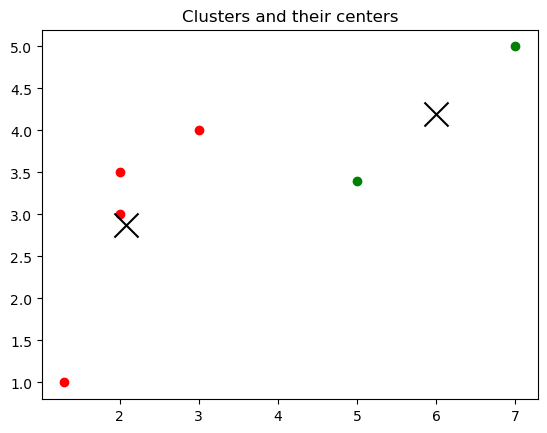

In [5]:
import matplotlib.pyplot as plt

# Toy dataset with 2D points
data = [(2,3), (5,3.4), (1.3,1), (3,4), (2,3.5), (7,5)]

# k-Means settings
k = 2  
centers = [data[0], data[3]]  # Fixed initial centers selection.

# Definition of Euclidean distance
def distance(point1, point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5

# k-Means algorithm
def k_means(data, centers, k):
    while True:
        clusters = [[] for _ in range(k)]

        # Assign data points to the closest center
        for point in data:
            distances = [distance(point, center) for center in centers]
            index = distances.index(min(distances))
            clusters[index].append(point)

        # Update centers to be the mean of points in a cluster
        new_centers = []
        for cluster in clusters:
            if len(cluster) == 0:  # We only expect valid clusters with our data.
                continue
            center = (sum([point[0] for point in cluster])/len(cluster), 
                      sum([point[1] for point in cluster])/len(cluster))
            new_centers.append(center)

        # Break loop if centers don't change significantly
        if max([distance(new, old) for new, old in zip(new_centers, centers)]) < 0.0001:
            break
        else:
            centers = new_centers
    return clusters, centers

clusters, centers = k_means(data, centers, k)

# Visualization of the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# Plot points
for i, cluster in enumerate(clusters):
    for point in cluster:
        ax.scatter(*point, color=colors[i])

# Plot centers
for i, center in enumerate(centers):
    ax.scatter(*center, color='black', marker='x', s=300)

ax.set_title('Clusters and their centers')
plt.show()

In [6]:
def get_clusters(data, centers):
    clusters = [[] for _ in range(len(centers))]
    for point in data:
        distances = [distance(point, center) for center in centers]
        index = distances.index(min(distances))
        clusters[index].append(point)
    return clusters

def update_centers(clusters):
    new_centers = []
    for cluster in clusters:
        if len(cluster) == 0:
            continue
        center = (sum([point[0] for point in cluster])/len(cluster), 
                  sum([point[1] for point in cluster])/len(cluster))
        new_centers.append(center)
    return new_centers

def k_means(data, centers, k):
    while True:
        clusters = get_clusters(data, centers)
        new_centers = update_centers(clusters)
        if max([distance(new, old) for new, old in zip(new_centers, centers)]) < 0.0001:
            break
        else:
            centers = new_centers
    return clusters, centers

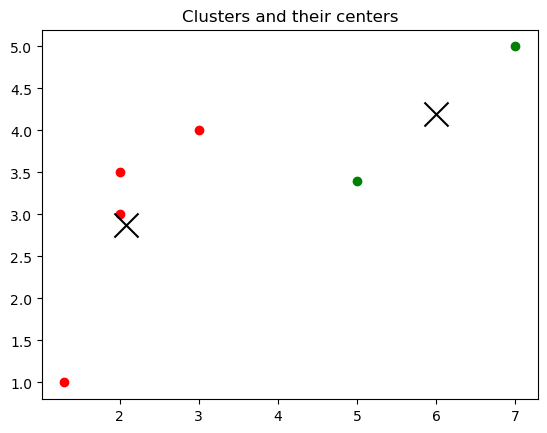

In [7]:
class KMeans:
    def __init__(self, k, centers):
        self.k = k
        self.centers = centers

    def distance(self, point1, point2):
        return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5

    def get_clusters(self, data):
        clusters = [[] for _ in range(self.k)]
        for point in data:
            distances = [self.distance(point, center) for center in self.centers]
            index = distances.index(min(distances))
            clusters[index].append(point)
        return clusters

    def update_centers(self, clusters):
        new_centers = []
        for cluster in clusters:
            if len(cluster) == 0:
                continue
            center = (sum([point[0] for point in cluster])/len(cluster), 
                      sum([point[1] for point in cluster])/len(cluster))
            new_centers.append(center)
        return new_centers

    def fit_predict(self, data):
        while True:
            clusters = self.get_clusters(data)
            new_centers = self.update_centers(clusters)
            if max([self.distance(new, old) for new, old in zip(new_centers, self.centers)]) < 0.0001:
                break
            else:
                self.centers = new_centers
        return clusters, self.centers

# Usage
kmeans = KMeans(k=2, centers=[data[0], data[3]])
clusters, centers = kmeans.fit_predict(data)

# Visualization of the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# Plot points
for i, cluster in enumerate(clusters):
    for point in cluster:
        ax.scatter(*point, color=colors[i])

# Plot centers
for i, center in enumerate(centers):
    ax.scatter(*center, color='black', marker='x', s=300)

ax.set_title('Clusters and their centers')
plt.show()